# DECIMER Image classifier example
In this Jupyter notebook you can find an example on how to use the DECIMER Image classifier model to classify an image into chemical structure or non-chemical structure.
We use 10 test data images, 5 chemical structures and 5 non-chemical structures.

## Import libraries

In [1]:
import numpy as np
import os
import tensorflow as tf
import tensorflow.keras as keras
import pandas as pd
from tensorflow.keras.layers.experimental import preprocessing
from PIL import Image
import ipyplot

Using TensorFlow backend.


## Establish GPU growth

In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

## Import model and establish path

In [3]:
test_dir = './images/'
model = keras.models.load_model('/home/isa/saved_model/ChEMBL_public_data_EfficientNetB0_1_ntf_2_epochs_fine_tuned_v5')
preprocess_input = keras.applications.efficientnet.preprocess_input

2022-06-21 17:32:33.982007: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-06-21 17:32:34.491470: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 30980 MB memory:  -> device: 0, name: Tesla V100-PCIE-32GB, pci bus id: 0000:65:00.0, compute capability: 7.0


## Define function to predict the classifier score

In [4]:
def cnn_score(img,model,preprocess_input):
    '''
    Function to compute the classifier score for a particular image.
    
    Args: 
        img: image to classify imported as an array.
        model: the already loaded model.
        preprocess_input: the model preprocess step for the input.
    
    Returns:
        score: the image predicted score.
    
    '''
    desired_size = 224
    old_size = img.size
    grayscale_image = img.convert('L')
    if(old_size[0] or old_size[1] != desired_size):
        ratio = float(desired_size)/max(old_size)
        new_size = tuple([int(x*ratio) for x in old_size])
        grayscale_image = grayscale_image.resize(new_size, Image.Resampling.LANCZOS)
    resized_image = Image.new('L',(desired_size, desired_size),'white')
    resized_image.paste(grayscale_image,((desired_size-new_size[0])//2,(desired_size-new_size[1])//2))
    img = resized_image
    img_array = keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)
    img_array = preprocess_input(img_array)
    predictions = model.predict(img_array)
    score = tf.nn.sigmoid(predictions[0])
    return score.numpy()[0]

## Example on 10 images

Here you can see 8 good examples of how the model performs and 2 bad examples, one for each possible class (CNP0460730.1_2.png and MMU298754.jpg)

2022-06-21 17:32:46.135169: I tensorflow/stream_executor/cuda/cuda_dnn.cc:366] Loaded cuDNN version 8400
2022-06-21 17:32:46.586994: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


CHEMBL2145065_4.png has a predicted score of 2.6847237e-18.
CHEMBL552171_1.png has a predicted score of 6.2129023e-18.
CHEMBL1463290_3.png has a predicted score of 7.882628e-18.
CHEMBL1302040_4.png has a predicted score of 8.2831385e-18.
chinese91026.jpg has a predicted score of 1.0.
random_scatter_plot_64933.png has a predicted score of 1.0.
gsun_4cb2596f8092816e7bc999fd9ffe0771.jpg has a predicted score of 1.0.
grapheme171839.png has a predicted score of 1.0.


/home/isa/anaconda3/envs/tf27/lib/python3.8/site-packages/ipyplot/_utils.py:95: FutureWarning: The input object of type 'PngImageFile' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'PngImageFile', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  return np.asarray(seq, dtype=type(seq[0]))



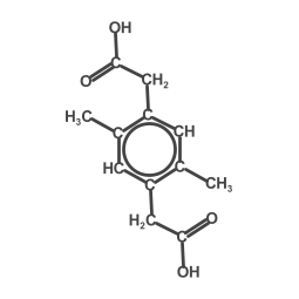
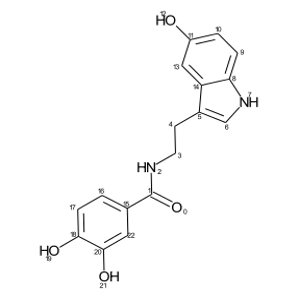
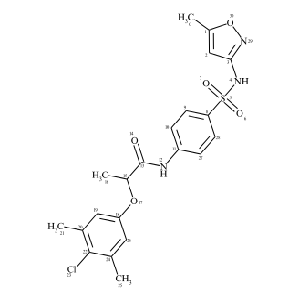
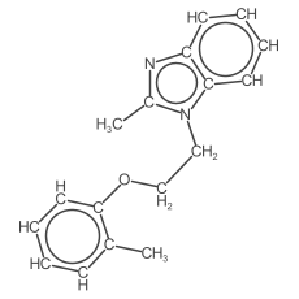
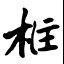
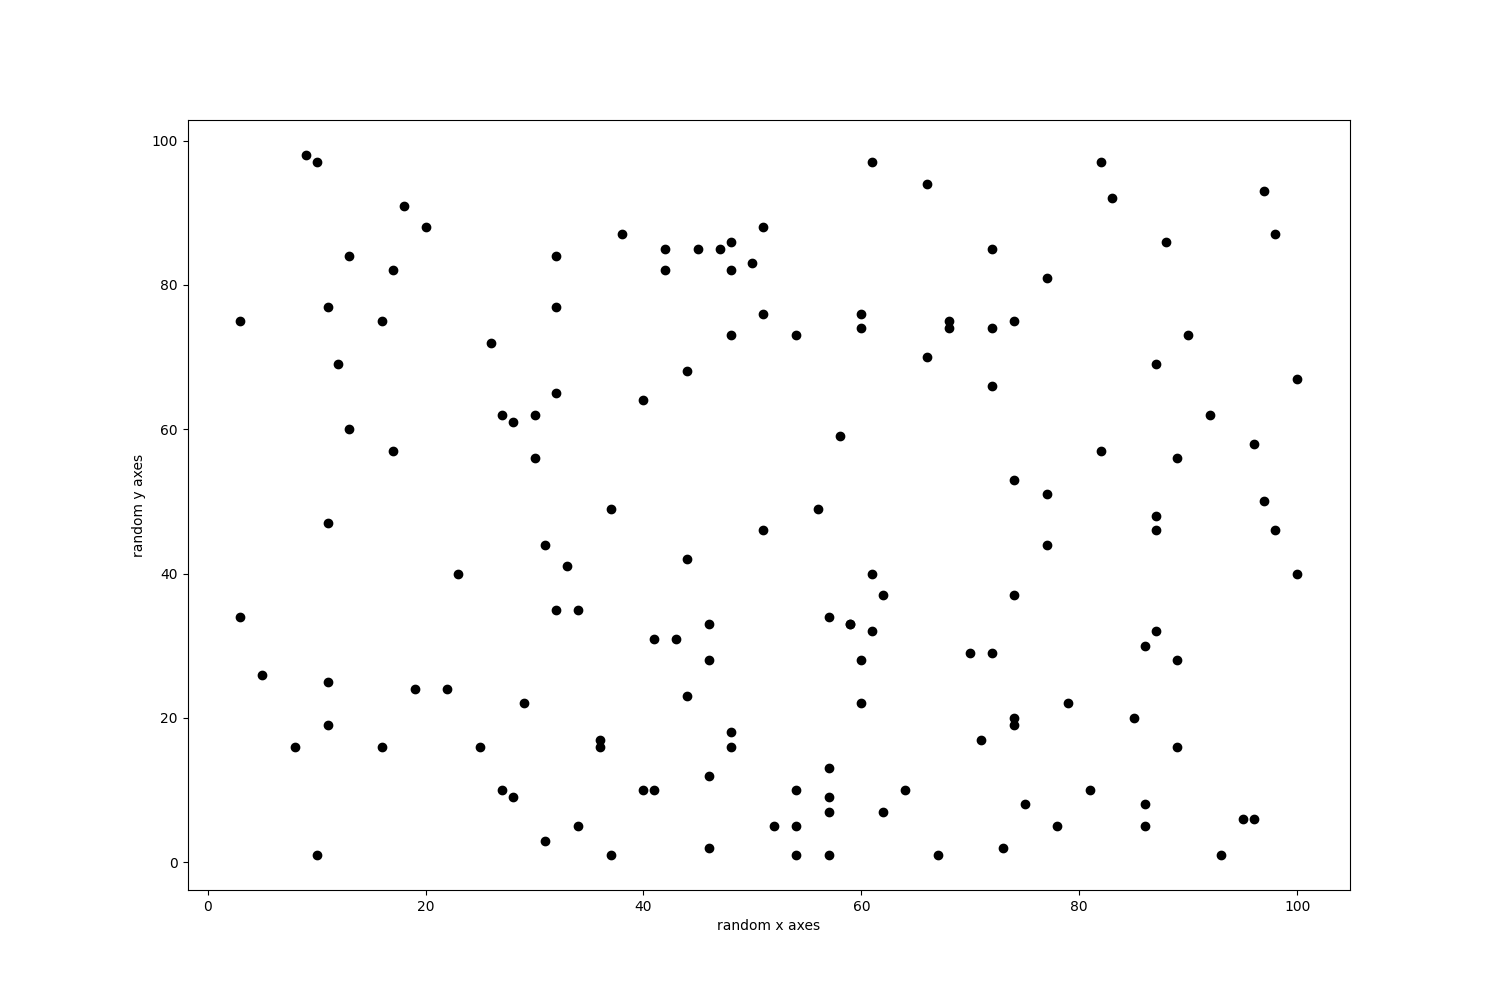
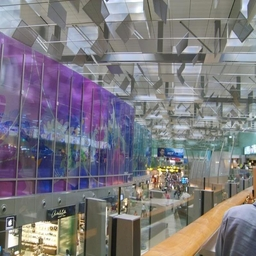
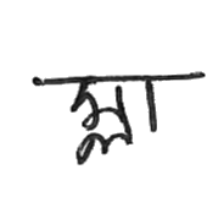


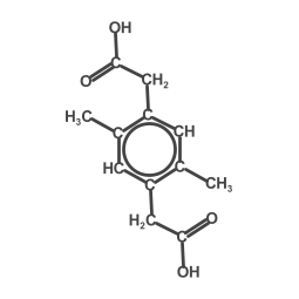
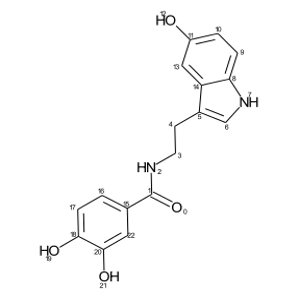
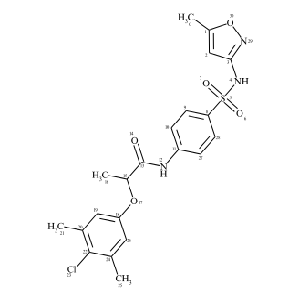
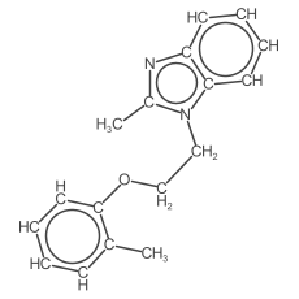
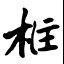
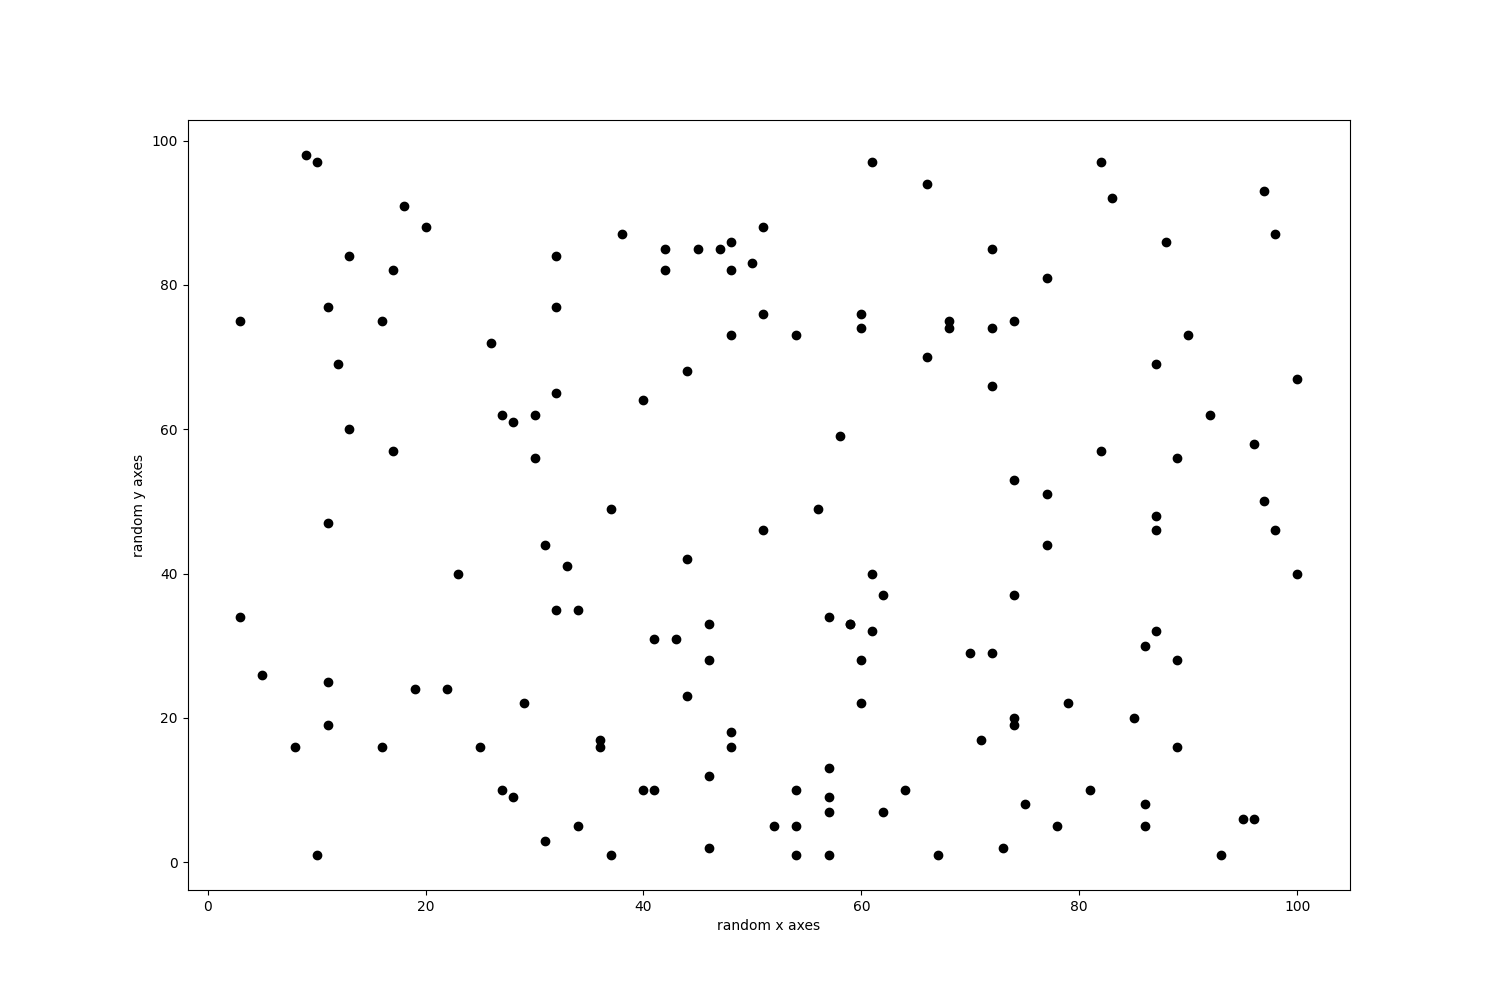
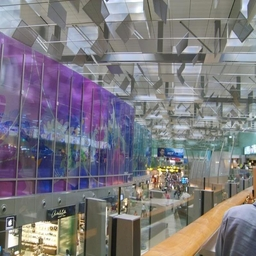
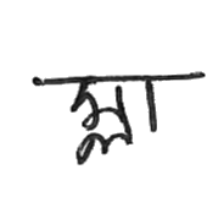

In [5]:
images = os.listdir(test_dir)
images.remove('MMU298754.jpg')
images.remove('CNP0460730.1_2.png')
images_loaded=[]
for img in images:
    img_arr = Image.open(test_dir+img)
    score = cnn_score(img_arr,model,preprocess_input)
    images_loaded.append(img_arr)
    print('{} has a predicted score of {}.'.format(img,str(score)))

ipyplot.plot_images(images_loaded, max_images=8, img_width=100)

CNP0460730.1_2.png has a predicted score of 0.99031514.


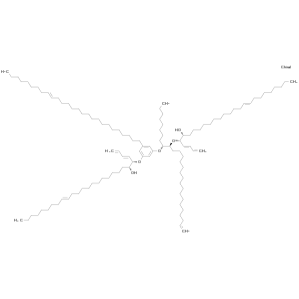

In [6]:
img='CNP0460730.1_2.png'
img_arr = Image.open(test_dir+img)
score = cnn_score(img_arr,model,preprocess_input)
print('{} has a predicted score of {}.'.format(img,str(score)))
img_arr

MMU298754.jpg has a predicted score of 5.0838073e-05.


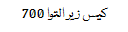

In [7]:
img='MMU298754.jpg'
img_arr = Image.open(test_dir+img)
score = cnn_score(img_arr,model,preprocess_input)
print('{} has a predicted score of {}.'.format(img,str(score)))
img_arr